# LetsGrowMore
## Name: Sudipta Ghosh
## Data Science Intern
## Task :Prediction using Decision Tree  Algorithm
## Task Level: INTERMEDIATE LEVEL TASK

### Importing Libraries

In [25]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Seperating Independent and Target Variable

In [3]:
X = df.iloc[:, :-1]
y = df.iloc[:,-1]

### Scaling of Independent Variables

In [5]:
X_scaled = StandardScaler().fit_transform(X)

### Separating Dataset for Training and Testing

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y , test_size = 0.25, random_state = 0)
print(X_train.shape)
print(y_train.shape)

(112, 5)
(112,)


### Model Building Using Decision Tree Classifier

In [18]:
score = []
for i in range(1,9):
    model = DecisionTreeClassifier(max_depth = i).fit(X_train, y_train)
    yhat = model.predict(X_test)
    accuracy = accuracy_score(yhat, y_test)
    score.append(accuracy)

In [19]:
score

[0.5526315789473685,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158]

### Accuracy Score is remaining same for max Depth >= 2

### So here we can use max depth as 2 but I will use 4 for better visualisation of Tree

In [37]:
model = DecisionTreeClassifier(max_depth = 4).fit(X_train, y_train)
yhat = model.predict(X_test)
accuracy_score(yhat, y_test)

0.9736842105263158

In [38]:
yhat

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor'], dtype=object)

In [39]:
y_test

114     Iris-virginica
62     Iris-versicolor
33         Iris-setosa
107     Iris-virginica
7          Iris-setosa
100     Iris-virginica
40         Iris-setosa
86     Iris-versicolor
76     Iris-versicolor
71     Iris-versicolor
134     Iris-virginica
51     Iris-versicolor
73     Iris-versicolor
54     Iris-versicolor
63     Iris-versicolor
37         Iris-setosa
78     Iris-versicolor
90     Iris-versicolor
45         Iris-setosa
16         Iris-setosa
121     Iris-virginica
66     Iris-versicolor
24         Iris-setosa
8          Iris-setosa
126     Iris-virginica
22         Iris-setosa
44         Iris-setosa
97     Iris-versicolor
93     Iris-versicolor
26         Iris-setosa
137     Iris-virginica
84     Iris-versicolor
27         Iris-setosa
127     Iris-virginica
132     Iris-virginica
59     Iris-versicolor
18         Iris-setosa
83     Iris-versicolor
Name: Species, dtype: object

### Visualisation of the Tree

[Text(200.88000000000002, 181.2, 'Id <= 0.589\ngini = 0.665\nsamples = 112\nvalue = [37, 34, 41]\nclass = Iris-virginica'),
 Text(133.92000000000002, 108.72, 'PetalWidthCm <= -0.524\ngini = 0.499\nsamples = 71\nvalue = [37, 34, 0]\nclass = Iris-setosa'),
 Text(66.96000000000001, 36.23999999999998, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]\nclass = Iris-setosa'),
 Text(200.88000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]\nclass = Iris-versicolor'),
 Text(267.84000000000003, 108.72, 'gini = 0.0\nsamples = 41\nvalue = [0, 0, 41]\nclass = Iris-virginica')]

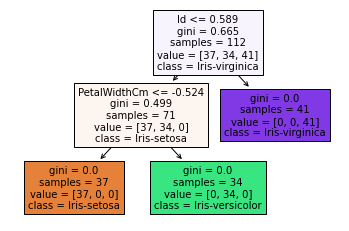

In [40]:
plot_tree(model, feature_names = df.columns[:-1], class_names= df['Species'].unique(), filled = True)

### Here We can see all the classes are separated after 2 step. gini = 0 tells us that interclass separation is completely done